In [1]:
#This shows the first 5 rows of your dataset.
#It’s like “standing up” for the first time.

import pandas as pd
df = pd.read_csv("telcom_churn.csv")

df.shape #understand the size(7043,21)
df.dtypes #Check the column type- This tels which column are numeric, 
          #which are object/text and which are categorical

df.isnull().sum() #Tells us if any column has missing data

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [23]:
# Convert TotalCharges to numeric, coerce errors to NaN

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors='coerce')
df.dtypes["TotalCharges"]

#Fill NaN with 0 for customer with tenure = 0
df["TotalCharges"].fillna(0)

#verify
df["TotalCharges"].dtypes
df.isnull().sum()

#MAke senior citizen more descriptive
#Now plots will read yes/no instead of 0/1
#For modelling later we can still encode this back to 0/1 later
# df
# df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})
# df
# df['SeniorCitizen'].value_counts()
# df['SeniorCitizen'].unique()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [11]:
df = pd.read_csv("telcom_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [13]:
df["SeniorCitizen"].unique()

array([0, 1])

In [14]:
df["SeniorCitizen"] = df["SeniorCitizen"].map({0:"NO", 1:"YES"})

In [16]:
df["SeniorCitizen"].value_counts()

SeniorCitizen
NO     5901
YES    1142
Name: count, dtype: int64

In [17]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [25]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols,categorical_cols

(Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object'),
 Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
        'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
        'Churn'],
       dtype='object'))

In [27]:
df["SeniorCitizen"]

0        NO
1        NO
2        NO
3        NO
4        NO
       ... 
7038     NO
7039     NO
7040     NO
7041    YES
7042     NO
Name: SeniorCitizen, Length: 7043, dtype: object

In [29]:
df['SeniorCitizen'].unique()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


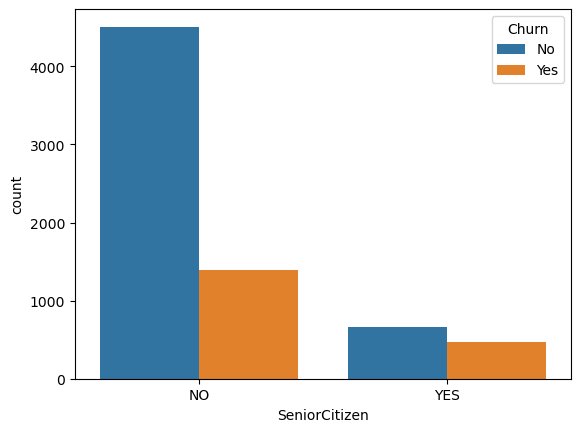

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.show()


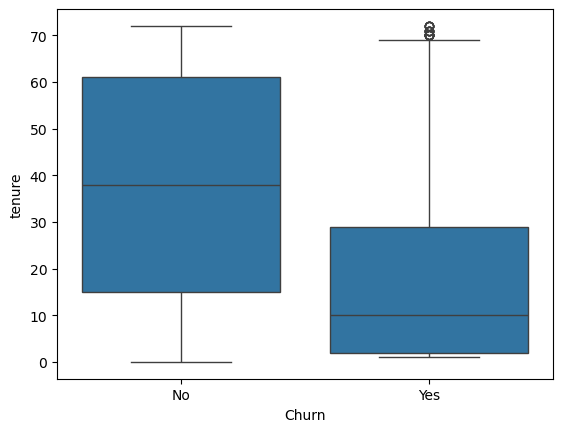

In [31]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.show()


In [32]:
df.groupby('Churn')['tenure'].describe()



,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,37.569965,24.113777,0.0,15.0,38.0,61.0,72.0
Yes,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0
